Point cloud

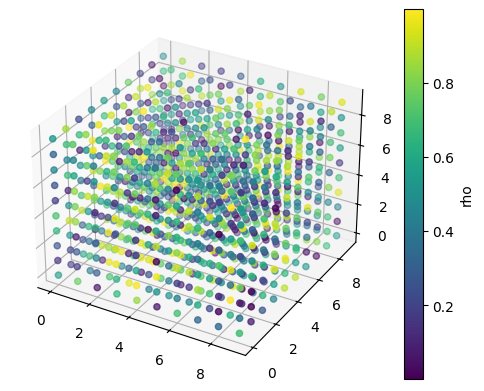

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Example 3D grid
nx, ny, nz = 10, 10, 10
x, y, z = np.meshgrid(np.arange(nx), np.arange(ny), np.arange(nz), indexing="ij")
rho = np.random.rand(nx, ny, nz)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

p = ax.scatter(x, y, z, c=rho.flatten(), cmap="viridis")
fig.colorbar(p, ax=ax, label="rho")

plt.show()


Plotly Volume rendering

In [4]:
import numpy as np
import plotly.graph_objects as go

# Example: 20x20x20 grid
nx, ny, nz = 20, 20, 20
x, y, z = np.meshgrid(np.arange(nx), np.arange(ny), np.arange(nz), indexing="ij")

rho = np.random.rand(nx, ny, nz)  # your 3D data

fig = go.Figure(data=go.Volume(
    x=x.flatten(),
    y=y.flatten(),
    z=z.flatten(),
    value=rho.flatten(),       # scalar field
    isomin=rho.min(),
    isomax=rho.max(),
    opacity=0.1,               # lower -> more transparent
    surface_count=15,          # number of isosurfaces
    colorscale="Viridis",
    caps=dict(x_show=False, y_show=False, z_show=False)  # hide cube caps
))

fig.update_layout(scene=dict(
    xaxis_title="X", yaxis_title="Y", zaxis_title="Z"
))

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Matplotlib Orthogonal slices with colormap

- I don't think this is the kind of plot we're looking for

ValueError: Contour levels must be increasing

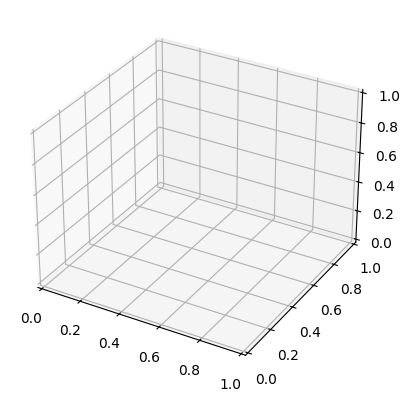

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Example data: 3D scalar field
nx, ny, nz = 40, 40, 40
x = np.linspace(-0.5, 0.5, nx)
y = np.linspace(-0.5, 0.5, ny)
z = np.linspace(-0.5, 0.5, nz)
X, Y, Z = np.meshgrid(x, y, z, indexing="ij")

rho = np.sin(2*np.pi*X) * np.cos(2*np.pi*Y) * np.sin(2*np.pi*Z)

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Choose slice positions
xslice = 0   # at x=0 plane
yslice = 0   # at y=0 plane
zslice = 0   # at z=0 plane

# Plot orthogonal slices with colormap
cmap = "inferno"

ax.contourf(X[:, :, zslice], Y[:, :, zslice], Z[:, :, zslice],
            rho[:, :, zslice], zdir='z', offset=z[zslice], cmap=cmap)

ax.contourf(X[:, yslice, :], Y[:, yslice, :], Z[:, yslice, :],
            rho[:, yslice, :], zdir='y', offset=y[yslice], cmap=cmap)

ax.contourf(X[xslice, :, :], Y[xslice, :, :], Z[xslice, :, :],
            rho[xslice, :, :], zdir='x', offset=x[xslice], cmap=cmap)

# Colorbar
m = plt.cm.ScalarMappable(cmap=cmap)
m.set_array(rho)
plt.colorbar(m, shrink=0.7, label="rho")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()


2nd try

Close enough

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

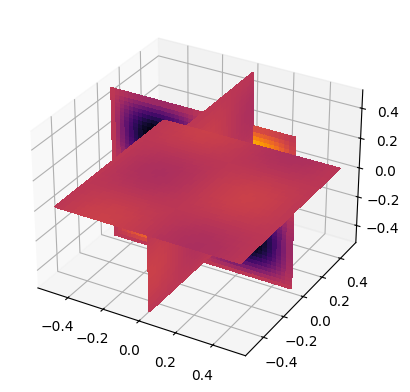

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Example data
nx, ny, nz = 40, 40, 40
x = np.linspace(-0.5, 0.5, nx)
y = np.linspace(-0.5, 0.5, ny)
z = np.linspace(-0.5, 0.5, nz)
X, Y, Z = np.meshgrid(x, y, z, indexing="ij")

rho = np.sin(2*np.pi*X) * np.cos(2*np.pi*Y) * np.sin(2*np.pi*Z)

# Choose slice indices
xslice = nx // 2
yslice = ny // 2
zslice = nz // 2

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Colormap normalization
norm = plt.Normalize(vmin=rho.min(), vmax=rho.max())
cmap = plt.cm.inferno

# X-slice
ax.plot_surface(X[xslice,:,:], Y[xslice,:,:], Z[xslice,:,:],
                facecolors=cmap(norm(rho[xslice,:,:])),
                rstride=1, cstride=1, antialiased=False, shade=False)

# Y-slice
ax.plot_surface(X[:,yslice,:], Y[:,yslice,:], Z[:,yslice,:],
                facecolors=cmap(norm(rho[:,yslice,:])),
                rstride=1, cstride=1, antialiased=False, shade=False)

# Z-slice
ax.plot_surface(X[:,:,zslice], Y[:,:,zslice], Z[:,:,zslice],
                facecolors=cmap(norm(rho[:,:,zslice])),
                rstride=1, cstride=1, antialiased=False, shade=False)

# Add colorbar
mappable = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
mappable.set_array(rho)
plt.colorbar(mappable, shrink=0.7, label="rho")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()


3rd try

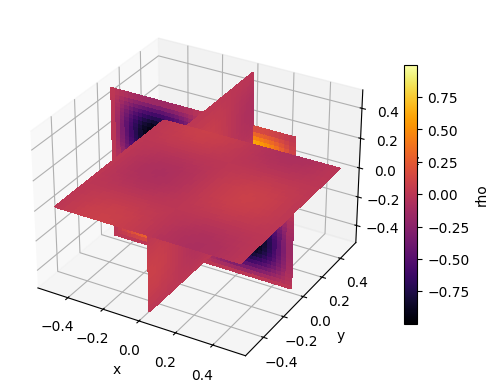

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Example data
nx, ny, nz = 40, 40, 40
x = np.linspace(-0.5, 0.5, nx)
y = np.linspace(-0.5, 0.5, ny)
z = np.linspace(-0.5, 0.5, nz)
X, Y, Z = np.meshgrid(x, y, z, indexing="ij")

rho = np.sin(2*np.pi*X) * np.cos(2*np.pi*Y) * np.sin(2*np.pi*Z)

# Choose slice indices
xslice = nx // 2
yslice = ny // 2
zslice = nz // 2

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Colormap normalization
norm = plt.Normalize(vmin=rho.min(), vmax=rho.max())
cmap = plt.cm.inferno

# X-slice
ax.plot_surface(X[xslice,:,:], Y[xslice,:,:], Z[xslice,:,:],
                facecolors=cmap(norm(rho[xslice,:,:])),
                rstride=1, cstride=1, antialiased=False, shade=False)

# Y-slice
ax.plot_surface(X[:,yslice,:], Y[:,yslice,:], Z[:,yslice,:],
                facecolors=cmap(norm(rho[:,yslice,:])),
                rstride=1, cstride=1, antialiased=False, shade=False)

# Z-slice
ax.plot_surface(X[:,:,zslice], Y[:,:,zslice], Z[:,:,zslice],
                facecolors=cmap(norm(rho[:,:,zslice])),
                rstride=1, cstride=1, antialiased=False, shade=False)

# Add colorbar (fixed!)
mappable = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
mappable.set_array(rho)
plt.colorbar(mappable, ax=ax, shrink=0.7, label="rho")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()


Not good enough 

Stackoverflow 1st try

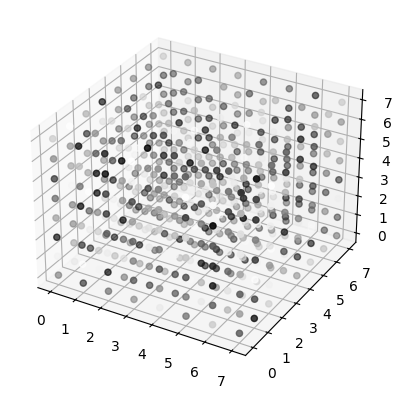

In [8]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

# Make this bigger to generate a dense grid.
N = 8

# Create some random data.
volume = np.random.rand(N, N, N)

# Create the x, y, and z coordinate arrays.  We use 
# numpy's broadcasting to do all the hard work for us.
# We could shorten this even more by using np.meshgrid.
x = np.arange(volume.shape[0])[:, None, None]
y = np.arange(volume.shape[1])[None, :, None]
z = np.arange(volume.shape[2])[None, None, :]
x, y, z = np.broadcast_arrays(x, y, z)

# Turn the volumetric data into an RGB array that's
# just grayscale.  There might be better ways to make
# ax.scatter happy.
c = np.tile(volume.ravel()[:, None], [1, 3])

# Do the plotting in a single call.
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x.ravel(),
           y.ravel(),
           z.ravel(),
           c=c)

plt.show()

Stackoverflow 2nd try  (didn't run)

In [9]:
import functools
import itertools as IT
import numpy as np
import scipy.ndimage as ndimage
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
def cartesian_product_broadcasted(*arrays):
    """
    http://stackoverflow.com/a/11146645/190597 (senderle)
    """
    broadcastable = np.ix_(*arrays)
    broadcasted = np.broadcast_arrays(*broadcastable)
    dtype = np.result_type(*arrays)
    rows, cols = functools.reduce(np.multiply, broadcasted[0].shape), len(broadcasted)
    out = np.empty(rows * cols, dtype=dtype)
    start, end = 0, rows
    for a in broadcasted:
        out[start:end] = a.reshape(-1)
        start, end = end, end + rows
    return out.reshape(cols, rows).T

# @profile  # used with `python -m memory_profiler script.py` to measure memory usage
def main():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection='3d')

    size = 512
    volume = np.random.rand(size, size, size)
    x, y, z = cartesian_product_broadcasted(*[np.arange(size, dtype='int16')]*3).T
    mask = ((x == 0) | (x == size-1) 
            | (y == 0) | (y == size-1) 
            | (z == 0) | (z == size-1))
    x = x[mask]
    y = y[mask]
    z = z[mask]
    volume = volume.ravel()[mask]

    ax.scatter(x, y, z, c=volume, cmap=plt.get_cmap('Greys'))
    plt.show()

if __name__ == '__main__':
    main()

Matplotlib docs: 3D box surface plot: [docs](https://matplotlib.org/stable/gallery/mplot3d/index.html)

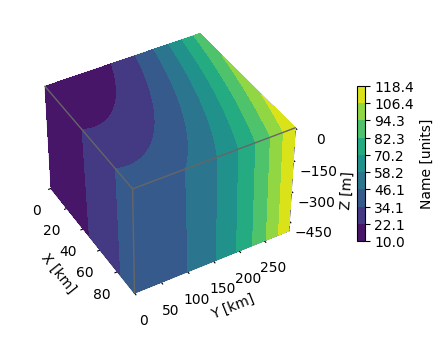

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define dimensions
Nx, Ny, Nz = 100, 300, 500
X, Y, Z = np.meshgrid(np.arange(Nx), np.arange(Ny), -np.arange(Nz))

# Create fake data
data = (((X+100)**2 + (Y-20)**2 + 2*Z)/1000+1)

kw = {
    'vmin': data.min(),
    'vmax': data.max(),
    'levels': np.linspace(data.min(), data.max(), 10),
}

# Create a figure with 3D ax
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111, projection='3d')

# Plot contour surfaces
_ = ax.contourf(
    X[:, :, 0], Y[:, :, 0], data[:, :, 0],
    zdir='z', offset=0, **kw
)
_ = ax.contourf(
    X[0, :, :], data[0, :, :], Z[0, :, :],
    zdir='y', offset=0, **kw
)
C = ax.contourf(
    data[:, -1, :], Y[:, -1, :], Z[:, -1, :],
    zdir='x', offset=X.max(), **kw
)
# --


# Set limits of the plot from coord limits
xmin, xmax = X.min(), X.max()
ymin, ymax = Y.min(), Y.max()
zmin, zmax = Z.min(), Z.max()
ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])

# Plot edges
edges_kw = dict(color='0.4', linewidth=1, zorder=1e3)
ax.plot([xmax, xmax], [ymin, ymax], 0, **edges_kw)
ax.plot([xmin, xmax], [ymin, ymin], 0, **edges_kw)
ax.plot([xmax, xmax], [ymin, ymin], [zmin, zmax], **edges_kw)

# Set labels and zticks
ax.set(
    xlabel='X [km]',
    ylabel='Y [km]',
    zlabel='Z [m]',
    zticks=[0, -150, -300, -450],
)

# Set zoom and angle view
ax.view_init(40, -30, 0)
ax.set_box_aspect(None, zoom=0.9)

# Colorbar
fig.colorbar(C, ax=ax, fraction=0.02, pad=0.1, label='Name [units]')

# Show Figure
plt.show()

[docs](https://matplotlib.org/stable/gallery/ticks/colorbar_tick_labelling_demo.html#sphx-glr-gallery-ticks-colorbar-tick-labelling-demo-py)

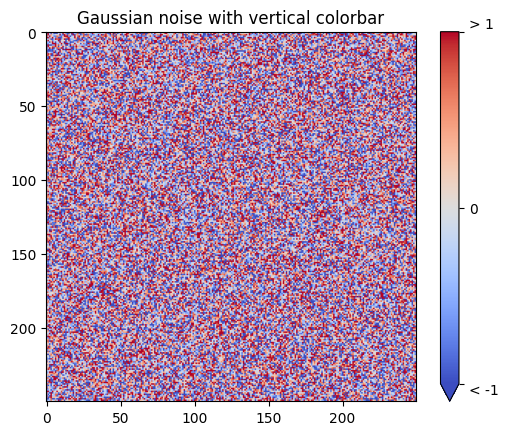

In [5]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.ticker as mticker

# Fixing random state for reproducibility
rng = np.random.default_rng(seed=19680801)

fig, ax = plt.subplots()

data = rng.standard_normal((250, 250))

cax = ax.imshow(data, vmin=-1, vmax=1, cmap='coolwarm')
ax.set_title('Gaussian noise with vertical colorbar')

# Add colorbar, make sure to specify tick locations to match desired ticklabels
cbar = fig.colorbar(cax,
                    ticks=[-1, 0, 1],
                    format=mticker.FixedFormatter(['< -1', '0', '> 1']),
                    extend='min'
                    )
labels = cbar.ax.get_yticklabels()
labels[0].set_verticalalignment('top')
labels[-1].set_verticalalignment('bottom')